In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

# **Описание задачи:**

Датасет содержит историю из 119390 бронирований отелей. Всего 36 признаков, по которым можно определить связь между отменой брони и остальными признаками.

In [ ]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/FlamasterRu/Machine-learning/main/task1/hotel_booking.csv")
data_raw.shape

(119390, 36)

In [ ]:
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
data_raw.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


# **Признаки:**

**hotel** - Вид отеля: городской или курортный.

**is_canceled** - Было ли отменено бронирование. Отменено - 1. Не отменено 0.

**lead_time** - Количество дней между датой бронирования и датой заселения.

**arrival_date_year** - Год заселения.

**arrival_date_month** - Месяц заселения.

**arrival_date_week_number** - Неделя заселения.

**arrival_date_day_of_month** - День заселения.

**stays_in_weekend_nights** - Количество ночей в выходные дни (суббота или воскресенье), в течение которых гость останавливался или забронировал проживание в отеле.

**stays_in_week_nights** - Количество ночей в неделю (с понедельника по пятницу), в течение которых гость останавливался или забронировал проживание в отеле.

**adults** - Количество взрослых.

**children** - Количество детей.

**babies** - Количество младенцев.

**meal** - Питание. BB - только завтрак, HB - завтрак и ужин, SC - самообслуживание, Undefined - не выбрано, FB - завтрак, обед и ужин. 

**country** - Страна из которой прибыл.

**market_segment** - Сегмент рынка. Online TA - онлайн через туристического агента. Offline TA/TO - через туристического агента или оператора. Groups - организованные группировки. Direct - непосредственно в отеле. Corporate - корпоративные клиенты.

**distribution_channel** - Канал бронирования. TA/TO -  бронирование через туристического агента или оператора. Direct - непосредственно в отеле. Corporate - компания. GDS - международная система бронирования. Undefined - не выбрано.

**is_repeated_guest** - Был ли гость в этом отеле раньше? Да - 1, нет - 0.

**previous_cancellations** - Количество отмененных бронирований до текущего бронирования.

**previous_bookings_not_canceled** - Количество не отмененных бронирований до текущего бронирования. 

**reserved_room_type** - Тип зарезервированного номера. (A, D, E, F, G)

**assigned_room_type** - Тип номера по брони. (A, D, E, F, G)

**booking_changes** - Количество изменений параметров бронирования. 

**deposit_type** - Тип депозита. No Deposit - без депозита. Non Refund - полный депозит без возврата. Refundable - полный депозит с возвратом.

**agent** - ID туристического агента.

**company** - ID компании корпоративного клиента.

**days_in_waiting_list** - Количество дней, которое клиент ожидал до подтверждения бронирования.

**customer_type** - Тип клиента. Group - когда бронирование связано с группой. Transient - когда бронирование не является частью группы или контракта и не связано с другим временным бронированием. Transient-party - огда бронирование является временным, но связано как минимум с другим временным бронированием.

**adr** - Средняя оплата за сутки.

**required_car_parking_spaces** - Требуемое клиентом количество парковочных мест.

**total_of_special_requests** - Количество дополнительных пожеланий клиента.

**reservation_status** - Статус. Check-Out - клиент зарегистрировался, но уже выехал. No-Show - клиент не зарегистрировался и не сообщил о причине.

**reservation_status_date** - Когда была отмена бронирования или клиент выехал.

**name** - Имя клиента.

**email** - Электронная почта клиента.

**phone-number** - Номер телефона клиента.

**credit_card** - Номер банковской карты клиента.

Выведем информацию о столбцах, чтобы узнать тип значений в них:


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Имена признаков:

In [ ]:
data_raw.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
data_raw.index

RangeIndex(start=0, stop=119390, step=1)

# **Обработка пропущенных значений**

In [ ]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
data_raw[categorical_columns].count(axis = 0)

hotel                      119390
arrival_date_month         119390
meal                       119390
country                    118902
market_segment             119390
distribution_channel       119390
reserved_room_type         119390
assigned_room_type         119390
deposit_type               119390
customer_type              119390
reservation_status         119390
reservation_status_date    119390
name                       119390
email                      119390
phone-number               119390
credit_card                119390
dtype: int64

Пропущенные значения в категориальных данных заполним популярными данными.

In [ ]:
data_raw['country'] = data_raw['country'].fillna(data_raw['country'].describe().top)
data_raw[categorical_columns].count(axis = 0)

hotel                      119390
arrival_date_month         119390
meal                       119390
country                    119390
market_segment             119390
distribution_channel       119390
reserved_room_type         119390
assigned_room_type         119390
deposit_type               119390
customer_type              119390
reservation_status         119390
reservation_status_date    119390
name                       119390
email                      119390
phone-number               119390
credit_card                119390
dtype: int64

In [ ]:
data_raw[numerical_columns].count(axis = 0)

is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
booking_changes                   119390
agent                             103050
company                             6797
days_in_waiting_list              119390
adr                               119390
required_car_parking_spaces       119390
total_of_special_requests         119390
dtype: int64

agent и company заполняем нулями, это будет обозначать отсутствие агента или номера компании.

In [ ]:
data_raw['agent'] = data_raw['agent'].fillna(0, axis = 0)
data_raw['company'] = data_raw['company'].fillna(0, axis = 0)
data_raw[numerical_columns].count(axis = 0)

is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
booking_changes                   119390
agent                             119390
company                           119390
days_in_waiting_list              119390
adr                               119390
required_car_parking_spaces       119390
total_of_special_requests         119390
dtype: int64

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Обработка категориальных значений**

Столбцы (hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, customer_type, reservation_status, reservation_status_date, name, email, phone-number, credit_card) Содержат категориальные признаки, необходимо преобразовать тип Object в специальный тип. Столбцы name, email, phone-number, credit_card - удалить, они не влияют на вероятность отмены бронирования.

In [ ]:
data_raw['hotel'] = data_raw['hotel'].astype('category')
data_raw['arrival_date_month'] = data_raw['arrival_date_month'].astype('category')
data_raw['meal'] = data_raw['meal'].astype('category')
data_raw['country'] = data_raw['country'].astype('category')
data_raw['market_segment'] = data_raw['market_segment'].astype('category')
data_raw['distribution_channel'] = data_raw['distribution_channel'].astype('category')
data_raw['reserved_room_type'] = data_raw['reserved_room_type'].astype('category')
data_raw['assigned_room_type'] = data_raw['assigned_room_type'].astype('category')
data_raw['deposit_type'] = data_raw['deposit_type'].astype('category')
data_raw['customer_type'] = data_raw['customer_type'].astype('category')
data_raw['reservation_status'] = data_raw['reservation_status'].astype('category')
data_raw['reservation_status_date'] = data_raw['reservation_status_date'].astype('category')

In [ ]:
data_raw['hotel'].dtype

CategoricalDtype(categories=['City Hotel', 'Resort Hotel'], ordered=False)

In [ ]:
data_raw['arrival_date_month'].dtype

CategoricalDtype(categories=['April', 'August', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September'],
, ordered=False)

In [ ]:
data_raw['meal'].dtype

CategoricalDtype(categories=['BB', 'FB', 'HB', 'SC', 'Undefined'], ordered=False)

In [ ]:
data_raw['country'].dtype

CategoricalDtype(categories=['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
                  'ASM', 'ATA',
                  ...
                  'UMI', 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF',
                  'ZMB', 'ZWE'],
, ordered=False)

In [ ]:
data_raw['market_segment'].dtype

CategoricalDtype(categories=['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
                  'Offline TA/TO', 'Online TA', 'Undefined'],
, ordered=False)

In [ ]:
data_raw['distribution_channel'].dtype

CategoricalDtype(categories=['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined'], ordered=False)

In [ ]:
data_raw['reserved_room_type'].dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'], ordered=False)

In [ ]:
data_raw['assigned_room_type'].dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'], ordered=False)

In [ ]:
data_raw['deposit_type'].dtype

CategoricalDtype(categories=['No Deposit', 'Non Refund', 'Refundable'], ordered=False)

In [ ]:
data_raw['customer_type'].dtype

CategoricalDtype(categories=['Contract', 'Group', 'Transient', 'Transient-Party'], ordered=False)

In [ ]:
data_raw['reservation_status'].dtype

CategoricalDtype(categories=['Canceled', 'Check-Out', 'No-Show'], ordered=False)

In [ ]:
data_raw['reservation_status_date'].dtype

CategoricalDtype(categories=['2014-10-17', '2014-11-18', '2015-01-01', '2015-01-02',
                  '2015-01-18', '2015-01-20', '2015-01-21', '2015-01-22',
                  '2015-01-28', '2015-01-29',
                  ...
                  '2017-09-03', '2017-09-04', '2017-09-05', '2017-09-06',
                  '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10',
                  '2017-09-12', '2017-09-14'],
, ordered=False)

Удаление столбцов, не нусещих уникальные данные или имеющих большое количество вариантов значений.

In [ ]:
data_raw.drop('name', inplace=True, axis=1)
data_raw.drop('email', inplace=True, axis=1)
data_raw.drop('phone-number', inplace=True, axis=1)
data_raw.drop('credit_card', inplace=True, axis=1)
data_raw.drop('country', inplace=True, axis=1)
data_raw.drop('reservation_status_date', inplace=True, axis=1)
data_raw.drop('arrival_date_month', inplace=True, axis=1)
data_raw.drop('reserved_room_type', inplace=True, axis=1)
data_raw.drop('assigned_room_type', inplace=True, axis=1)
data_raw.drop('reservation_status', inplace=True, axis=1)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  category
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_week_number        119390 non-null  int64   
 5   arrival_date_day_of_month       119390 non-null  int64   
 6   stays_in_weekend_nights         119390 non-null  int64   
 7   stays_in_week_nights            119390 non-null  int64   
 8   adults                          119390 non-null  int64   
 9   children                        119386 non-null  float64 
 10  babies                          119390 non-null  int64   
 11  meal                            119390 non-null  category
 12  ma

# **Обработка выбросов**

Зависимость отмены бронирования от количества дней до заселения.

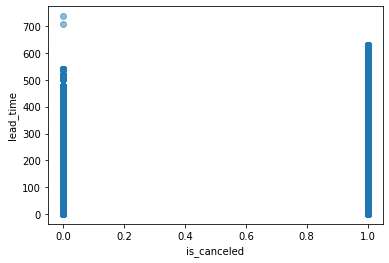

In [ ]:
plt.scatter(data_raw['is_canceled'], data_raw['lead_time'], alpha=0.5)
plt.xlabel('is_canceled')
plt.ylabel('lead_time')
pass

Видно, что из всех выделяются записи с бронью за два года.
Посмотрим квантили для lead_time.


In [ ]:
data_raw['lead_time'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100      3.0
0.500     69.0
0.700    138.0
0.900    265.0
0.950    320.0
0.999    605.0
1.000    737.0
Name: lead_time, dtype: float64

Удаляем записи, в которых срок брони более 605 дней. Кто вообще за два года бронирует отель?

In [ ]:
data_raw.shape

(119390, 26)

In [ ]:
rows_to_drop = data_raw[ (data_raw['lead_time'] > data_raw['lead_time'].quantile(0.999)) ].index
data_raw.drop(rows_to_drop, inplace=True, axis=0)
data_raw.shape

(119290, 26)

Зависимость истории отмен и истории успешных броней клиента.

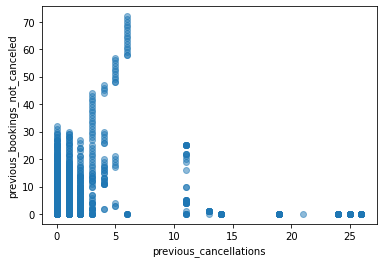

In [ ]:
plt.scatter(data_raw['previous_cancellations'], data_raw['previous_bookings_not_canceled'], alpha=0.5)
plt.xlabel('previous_cancellations')
plt.ylabel('previous_bookings_not_canceled')
pass

Есть клиенты, которые раньше никогда не заселялись в номер, но при этом больше 14 раз бронировали и отменяли. Скорее всего конкуренты. Посмотрим квантили для previous_cancellations.

In [ ]:
data_raw['previous_cancellations'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     0.0
0.500     0.0
0.700     0.0
0.900     0.0
0.950     1.0
0.999    14.0
1.000    26.0
Name: previous_cancellations, dtype: float64

Удаляем тех кто отменял более 14 раз.

In [ ]:
rows_to_drop = data_raw[ (data_raw['previous_cancellations'] > data_raw['previous_cancellations'].quantile(0.999)) ].index
data_raw.drop(rows_to_drop, inplace=True, axis=0)
data_raw.shape

(119069, 46)

# **Визуализация и описательная статистика**

Статистические значения: 25% - первый квартиль 50% - второй квартиль 75% - третий квартиль count - количество значений для каждого признака mean - среднее значение std - стандартное отклонение min/max - мин / макc значение

In [ ]:
data_raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119167.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000
mean,0.369276,103.449648,2016.157278,27.160668,15.806169,0.927935,2.500197,1.856207,0.104081,0.007963,0.031962,0.063489,0.137349,0.221480,74.847421,10.794959,2.325415,101.913066,0.062633,0.572413
std,0.482611,105.815542,0.706882,13.605583,8.779767,0.998670,1.908208,0.579719,0.398903,0.097525,0.175901,0.381999,1.498801,0.652724,107.160191,53.991448,17.610599,50.531509,0.245502,0.793148
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.530000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,605.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,14.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Статистика категориальных признаков:

count - всего значений;

unique - количество уникальных значений;

top - наиболее встречающееся значение;

freq - количество строк с наиболее встречающимся значением;

In [ ]:
data_raw.describe(include=['category'])

,hotel,meal,market_segment,distribution_channel,deposit_type,customer_type
count,119171,119171,119171,119171,119171,119171
unique,2,5,8,5,3,4
top,City Hotel,BB,Online TA,TA/TO,No Deposit,Transient
freq,79231,92167,56477,97678,104614,89419


Матрица корреляции

In [ ]:
cor_mat = data_raw.corr()
cor_mat

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.290023,0.018021,0.007712,-0.004977,-0.001248,0.024892,0.059683,0.005672,-0.032349,-0.084572,0.163181,-0.057231,-0.143785,-0.046428,-0.082655,0.054583,0.049751,-0.195211,-0.233430
lead_time,0.290023,1.000000,0.039665,0.129021,0.003613,0.088505,0.168390,0.120074,-0.036646,-0.020708,-0.124885,0.118648,-0.073859,0.001497,-0.010589,-0.086125,0.172630,-0.059179,-0.116364,-0.092963
arrival_date_year,0.018021,0.039665,1.000000,-0.540068,-0.002036,0.022391,0.031564,0.030083,0.054456,-0.013299,0.010253,-0.163831,0.029176,0.030677,0.057679,0.033738,-0.056732,0.197038,-0.013971,0.108035
arrival_date_week_number,0.007712,0.129021,-0.540068,1.000000,0.068207,0.017414,0.015449,0.025720,0.005610,0.010432,-0.030105,0.037531,-0.020892,0.005661,-0.018980,-0.032714,0.022997,0.076442,0.002007,0.026424
arrival_date_day_of_month,-0.004977,0.003613,-0.002036,0.068207,1.000000,-0.015802,-0.028207,-0.001295,0.014324,-0.000304,-0.006280,-0.005813,-0.000383,0.010380,0.000469,0.003547,0.022632,0.029071,0.008463,0.002415
stays_in_weekend_nights,-0.001248,0.088505,0.022391,0.017414,-0.015802,1.000000,0.499147,0.091938,0.045747,0.018471,-0.087345,-0.039324,-0.042783,0.063105,0.160772,-0.080117,-0.054243,0.049582,-0.018657,0.072525
stays_in_week_nights,0.024892,0.168390,0.031564,0.015449,-0.028207,0.499147,1.000000,0.092972,0.044262,0.020215,-0.097331,-0.044718,-0.048785,0.096178,0.195181,-0.043673,-0.002015,0.065750,-0.024871,0.068329
adults,0.059683,0.120074,0.030083,0.025720,-0.001295,0.091938,0.092972,1.000000,0.030541,0.018176,-0.146418,-0.030278,-0.107967,-0.051598,0.024980,-0.166738,-0.008240,0.231206,0.014874,0.123203
children,0.005672,-0.036646,0.054456,0.005610,0.014324,0.045747,0.044262,0.030541,1.000000,0.023992,-0.032941,-0.038575,-0.021118,0.048823,0.050570,-0.042723,-0.033338,0.324777,0.056138,0.081444
babies,-0.032349,-0.020708,-0.013299,0.010432,-0.000304,0.018471,0.020215,0.018176,0.023992,1.000000,-0.008967,-0.011544,-0.006564,0.083419,0.030274,-0.009489,-0.010641,0.029083,0.037348,0.097828


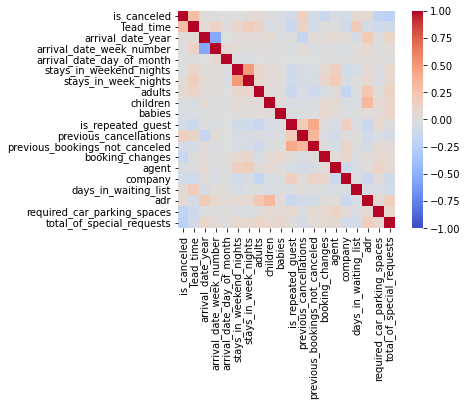

In [ ]:
sns.heatmap(cor_mat, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

In [ ]:
cor_mat.where( np.triu(cor_mat > 0.25, k=1) ).stack().sort_values(ascending=False)

stays_in_weekend_nights  stays_in_week_nights              0.499147
is_repeated_guest        previous_bookings_not_canceled    0.418099
previous_cancellations   previous_bookings_not_canceled    0.343558
children                 adr                               0.324777
is_canceled              lead_time                         0.290023
dtype: float64

Максимальная корреляция между **количеством ночей в отеле** и тем, что **гости находились в будние дни** не имеет смысла, так как люди если приезжают, то на все выходные или в воскресенье выезжают, чтобы вернуться к началу рабочей недели. Эта связь никак не влияет на исследование задачи. Или приезжают по работе только на будние дни.

Связь между **гостем, который уже был в этом отеле** и **количеством предыдущих отмет брони** имеет смысл. Если гость ещё раз бронирует отель, в котором был, значит ему понравилось и бронь отменит только в случае непредвиденных обстоятельств.

Полезна связь между **отменой брони** и **количеством дней до прибытия в отель**. Если бронировать за длительное время, то гость может найти что-нибудь получше или изменить свои планы.

Сравнение количества отменёных броней и нет.

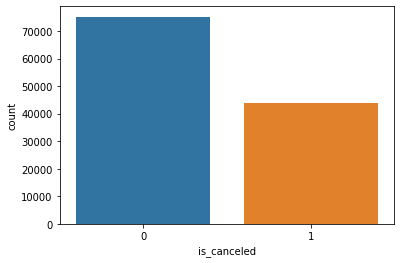

In [ ]:
sns.countplot(data=data_raw,x='is_canceled')
pass

Как видно, бронь отменяют очень часто. Оказывается.

**Преобразование категориальных признаков к не строковым**

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119171 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119171 non-null  category
 1   is_canceled                     119171 non-null  int64   
 2   lead_time                       119171 non-null  int64   
 3   arrival_date_year               119171 non-null  int64   
 4   arrival_date_week_number        119171 non-null  int64   
 5   arrival_date_day_of_month       119171 non-null  int64   
 6   stays_in_weekend_nights         119171 non-null  int64   
 7   stays_in_week_nights            119171 non-null  int64   
 8   adults                          119171 non-null  int64   
 9   children                        119167 non-null  float64 
 10  babies                          119171 non-null  int64   
 11  meal                            119171 non-null  category
 12  ma

6 категориальных признаков: "hotel", "meal", "market_segment", "distribution_channel", "deposit_type", "customer_type".

Бинарнй признак: "hotel"

In [ ]:
data_raw['hotel'] = pd.factorize(data_raw['hotel'])[0]

Векторизация остальных признаков

In [ ]:
meal_dummies = pd.get_dummies(data_raw['meal'])
meal_dummies.head()

,BB,FB,HB,SC,Undefined
0,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0


In [ ]:
market_dummies = pd.get_dummies(data_raw['market_segment'])
market_dummies.head()

,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,1,0


In [ ]:
distribution_dummies = pd.get_dummies(data_raw['distribution_channel'])
distribution_dummies.head()

,Corporate,Direct,GDS,TA/TO,Undefined
0,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0
5,0,0,0,1,0


In [ ]:
deposit_dummies = pd.get_dummies(data_raw['deposit_type'])
deposit_dummies.head()

,No Deposit,Non Refund,Refundable
0,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [ ]:
customer_dummies = pd.get_dummies(data_raw['customer_type'])
customer_dummies.head()

,Contract,Group,Transient,Transient-Party
0,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0


In [ ]:
data_raw = pd.concat((data_raw, meal_dummies), axis = 1)
data_raw = pd.concat((data_raw, market_dummies), axis = 1)
data_raw = pd.concat((data_raw, distribution_dummies), axis = 1)
data_raw = pd.concat((data_raw, deposit_dummies), axis = 1)
data_raw = pd.concat((data_raw, customer_dummies), axis = 1)

data_raw = data_raw.drop(["meal", "market_segment", "distribution_channel", "deposit_type", "customer_type"], axis = 1)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119171 entries, 0 to 119389
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119171 non-null  int64  
 1   is_canceled                     119171 non-null  int64  
 2   lead_time                       119171 non-null  int64  
 3   arrival_date_year               119171 non-null  int64  
 4   arrival_date_week_number        119171 non-null  int64  
 5   arrival_date_day_of_month       119171 non-null  int64  
 6   stays_in_weekend_nights         119171 non-null  int64  
 7   stays_in_week_nights            119171 non-null  int64  
 8   adults                          119171 non-null  int64  
 9   children                        119167 non-null  float64
 10  babies                          119171 non-null  int64  
 11  is_repeated_guest               119171 non-null  int64  
 12  previous_cancell

# Нормализация значений

Каждое значение нормируется к интервалу [0, 1].

In [ ]:
data_norm = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_norm.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,GDS,TA/TO,Undefined,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party
count,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119167.000000,...,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000,119171.000000
mean,0.664851,0.369276,0.170991,0.578639,0.503090,0.493539,0.048839,0.050004,0.033749,0.010408,...,0.001620,0.819646,0.000042,0.877848,0.120793,0.001359,0.034203,0.004842,0.750342,0.210613
std,0.472044,0.482611,0.174902,0.353441,0.261646,0.292659,0.052562,0.038164,0.010540,0.039890,...,0.040211,0.384484,0.006477,0.327463,0.325888,0.036845,0.181751,0.069415,0.432817,0.407746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.029752,0.500000,0.288462,0.233333,0.000000,0.020000,0.036364,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.114050,0.500000,0.519231,0.500000,0.052632,0.040000,0.036364,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.264463,1.000000,0.711538,0.733333,0.105263,0.060000,0.036364,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Разбиение данных на тестовую и обучающие выборки.
Поле **children** пришлось удалить, данные содержали Nan значение.

In [ ]:
X = data_norm.drop(['is_canceled', 'Undefined', 'children'], axis = 1)
y = data_norm['is_canceled']
feature_names = X.columns
feature_names

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'BB', 'FB',
       'HB', 'SC', 'Aviation', 'Complementary', 'Corporate', 'Direct',
       'Groups', 'Offline TA/TO', 'Online TA', 'Corporate', 'Direct', 'GDS',
       'TA/TO', 'No Deposit', 'Non Refund', 'Refundable', 'Contract', 'Group',
       'Transient', 'Transient-Party'],
      dtype='object')

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X = X.to_numpy()
type(X)

numpy.ndarray

In [ ]:
y = np.array(y, dtype='int')
y

array([0, 0, 0, ..., 0, 0, 0])

75% на обучающую выборку. 25% на тестовую.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

N_train, _ = X_train.shape
N_test, _ = X_test.shape
N_train, N_test

(89378, 29793)

# Метод блихжайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.17950525291175778

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.17963951263719666

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.18437216795891653

# Random Forest

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
err_train

0.008682226051153527

In [ ]:
np.sum(rf.feature_importances_)

0.9999999999999999

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

(-5.0, 15.0)

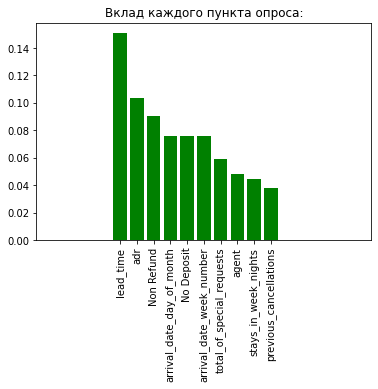

In [ ]:
d_first = 10
plt.title("Вклад каждого пункта опроса:")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'green')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-5, d_first+5])

# Вывод

Метод близжайших соседей при увеличении количества соседей результата на тестовой выборке не показывает. Ошибка около 0.18. Скорее всего это из-за большого количества признаков, которые попарно слабо связаны, но в совокупности дают результат.

А вот Метод случайного леса показал очень хорошие результаты. 
Наибольший вклад вносит время пребывания, что логично, шанс отмены краткосрочных гостей велик. 

Средняя оплата на сутки - гость дорогого отеля мог найти отель подешевле, особенно если цены завышены без оснований.

Так же интересно, что вляет день и неделя заселения. Возможно это время курортного сезона.

Я ожидал, что количество предыдущих отмен броней будет влиять сильнее всего, но это не так.
